In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
# Load your cleaned dataset
df = pd.read_csv('../data/processed/clean_sleep_no_outliers.csv')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,120,80
4,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,120,80


In [35]:
# Define target column
target = 'Quality of Sleep'

# Drop target from feature list
X = df.drop(columns=[target])
y = df[target]

# Separate column types
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
# Train the model
model.fit(X_train, y_train)
print("Model trained successfully.")


Model trained successfully.


In [ ]:
# Full ML Pipeline 
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Save the pipeline
import os
import joblib

os.makedirs('../models', exist_ok=True)
joblib.dump(model, '../models/sleep_quality_model.pkl')

print("Model saved successfully.")


✅ Model saved successfully.


In [39]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.09
R² Score: 1.00


In [40]:
df.corr(numeric_only=True)['Quality of Sleep'].sort_values(ascending=False)


Quality of Sleep           1.000000
Sleep Duration             0.889815
Age                        0.439260
Physical Activity Level    0.127943
Systolic_BP               -0.086196
Diastolic_BP              -0.091125
Daily Steps               -0.093540
Heart Rate                -0.721403
Stress Level              -0.908132
Name: Quality of Sleep, dtype: float64

In [41]:
# Print actual vs predicted
sample_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(sample_results.head(10))


   Actual  Predicted
0       6       6.00
1       7       7.00
2       9       8.94
3       9       9.00
4       6       6.00
5       6       6.00
6       7       7.00
7       6       6.00
8       7       7.00
9       8       8.00


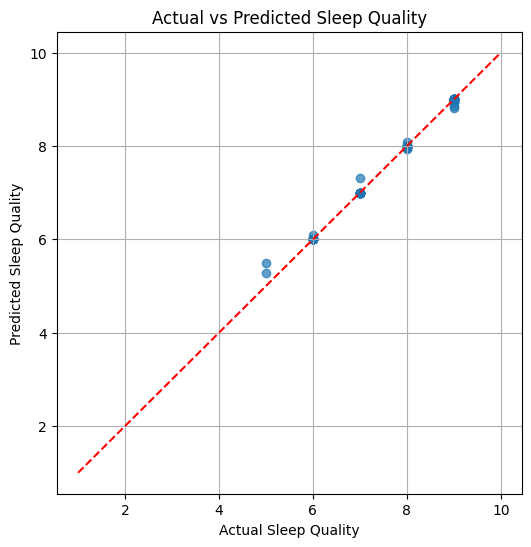

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([1,10], [1,10], color='red', linestyle='--')
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.title("Actual vs Predicted Sleep Quality")
plt.grid(True)
plt.show()


In [43]:
# Step 1: Get feature names after OneHotEncoding
# Access transformers from the pipeline
preprocessor = model.named_steps['preprocessing']

# Get column names after encoding
ohe = preprocessor.named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = np.concatenate([numeric_cols, encoded_cat_names])


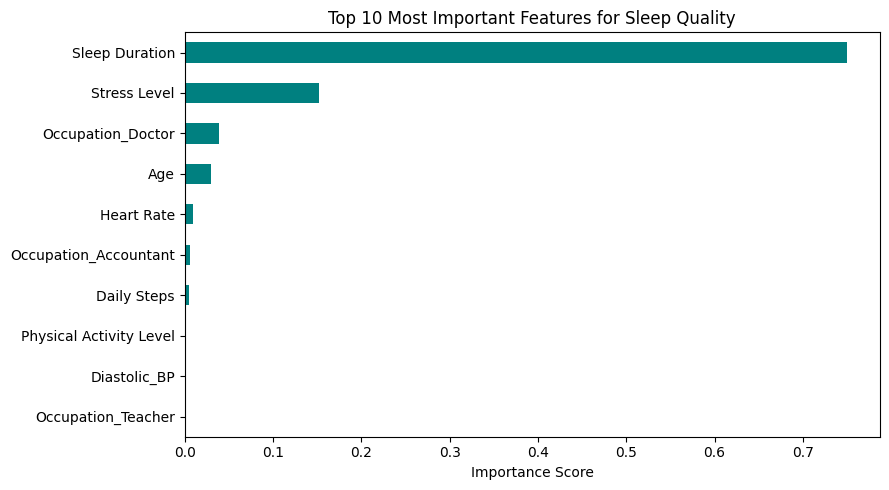

In [44]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.named_steps['regressor'].feature_importances_

# Combine names + scores
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(9, 5))
feat_imp[:10].plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Features for Sleep Quality")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [45]:
import shap

# 1. Preprocess training features
X_transformed = preprocessor.fit_transform(X_train)

# 2. Convert to DataFrame (optional for readability)
feature_names = all_feature_names
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# 3. Create SHAP explainer (use regressor directly)
explainer = shap.Explainer(model.named_steps['regressor'], X_transformed_df)

# 4. Calculate SHAP values
shap_values = explainer(X_transformed_df)


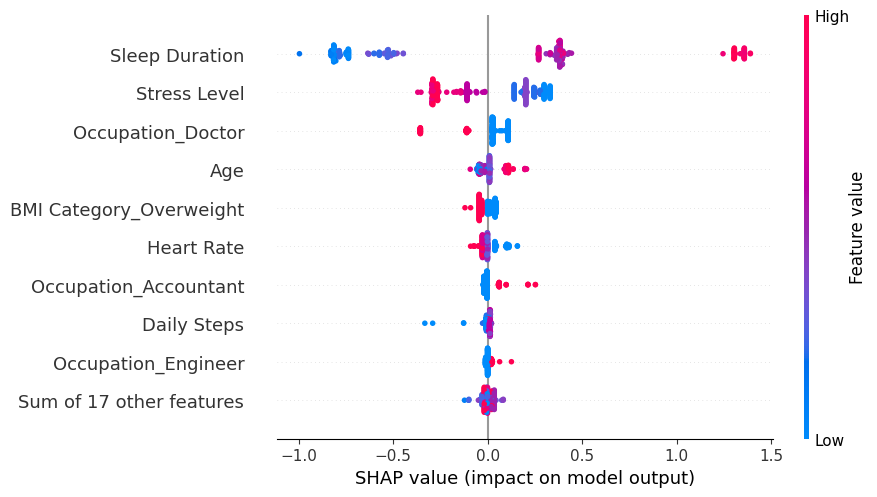

In [46]:
shap.plots.beeswarm(shap_values, max_display=10)


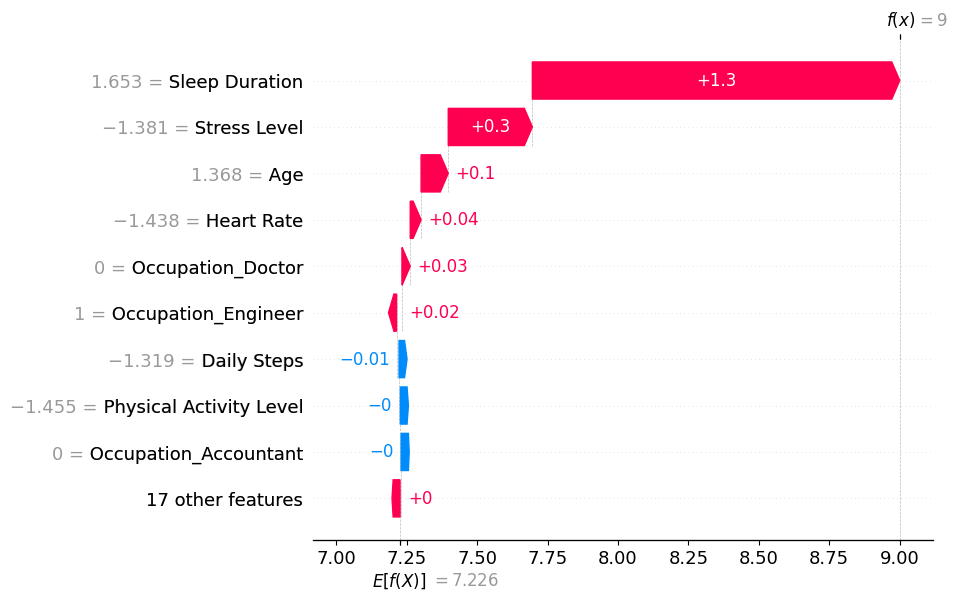

In [47]:
# Preprocess a single row
i = 5  # change this to explore other people
X_test_transformed = preprocessor.transform(X_test)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Explain one prediction
shap.plots.waterfall(shap_values[i])


In [ ]:
import os

# Make the folder if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Then save the model
import joblib
joblib.dump(model, '../models/sleep_quality_model.pkl')

print(" Model saved successfully.")


✅ Model saved successfully.
